In [ ]:
from google.colab import files
uploaded = files.upload()

Saving uybor.xlsx to uybor (5).xlsx


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("uybor.xlsx")

In [ ]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["price"] >= Q1 - 1.5*IQR) & (df["price"] <= Q3 + 1.5*IQR)]

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop("price", axis=1)
y = np.log(df["price"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=500,
                          random_state=42, subsample=0.8)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

MSE: 0.031046796526358816
R² score: 0.8142165654818897


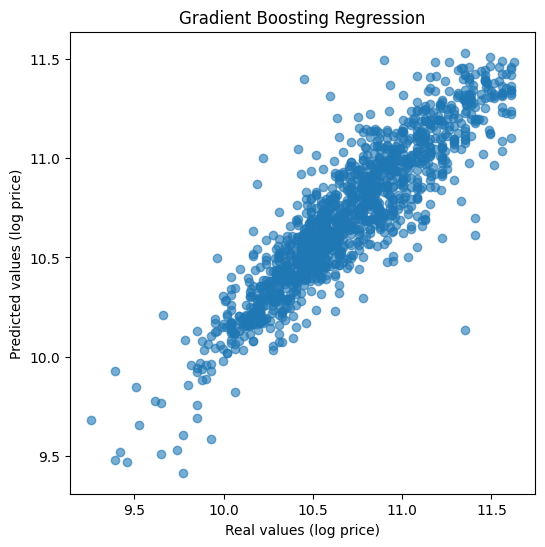

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Real values (log price)")
plt.ylabel("Predicted values (log price)")
plt.title("Gradient Boosting Regression")
plt.show()